In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

import yfinance as yf 

In [4]:
# Set the start and end date for the data
start = '2012-01-01'
end = '2023-01-01'

stock = 'GOOG'

data = yf.download(stock, start=start, end=end)


[*********************100%***********************]  1 of 1 completed


In [5]:
data.reset_index(inplace=True) 
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,16.262545,16.641375,16.248346,16.573130,16.532528,147611217
1,2012-01-04,16.563665,16.693678,16.453827,16.644611,16.603836,114989399
2,2012-01-05,16.491436,16.537264,16.344486,16.413727,16.373516,131808205
3,2012-01-06,16.417213,16.438385,16.184088,16.189817,16.150156,108119746
4,2012-01-09,16.102144,16.114599,15.472754,15.503389,15.465409,233776981
...,...,...,...,...,...,...,...
2763,2022-12-23,87.620003,90.099998,87.620003,89.809998,89.589981,17815000
2764,2022-12-27,89.309998,89.500000,87.535004,87.930000,87.714592,15470900
2765,2022-12-28,87.500000,88.519997,86.370003,86.459999,86.248192,17879600
2766,2022-12-29,87.029999,89.364998,86.989998,88.949997,88.732086,18280700


In [6]:
ma_100_days = data['Close'].rolling(window=100).mean()

In [7]:
ma_100_days

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2763    101.9020
2764    101.5926
2765    101.2750
2766    100.9831
2767    100.6954
Name: Close, Length: 2768, dtype: float64

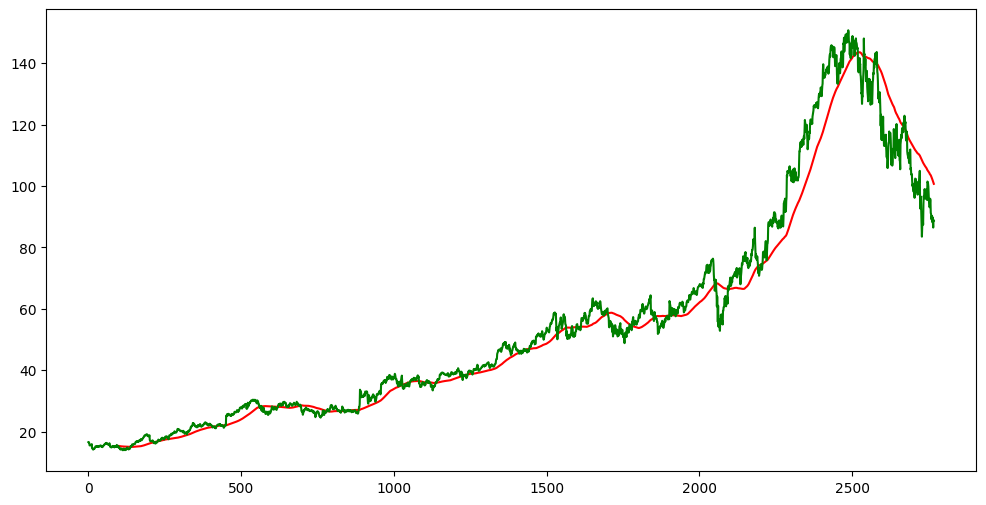

In [8]:
plt.figure(figsize=(12,6))
plt.plot(ma_100_days, 'r')
plt.plot(data['Close'], 'g')
plt.show()

In [9]:
ma_200_days = data.Close.rolling(200).mean()

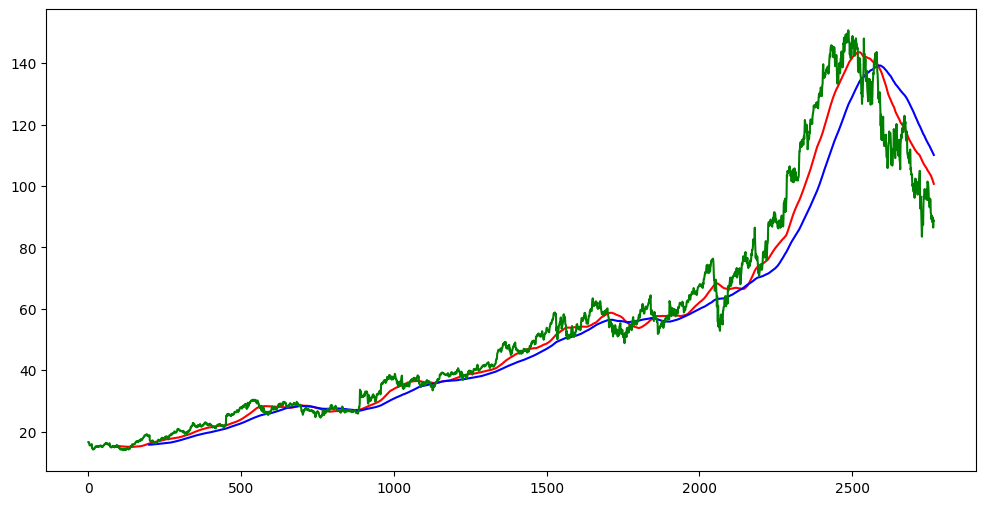

In [10]:
plt.figure(figsize=(12,6)) 
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days, 'b')
plt.plot(data['Close'], 'g')
plt.show()

In [11]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

# Model building

In [12]:
# split the data into training and testing data 
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.8)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.8):])

In [13]:
print(f"",data_train.shape[0], data_test.shape[0])

 2214 554


In [14]:
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler(feature_range=(0,1))


In [15]:
data_train_scale = scaler.fit_transform(data_train)

In [16]:
X = []
y = []

for i in range(100, data_train_scale.shape[0]):
    X.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])



In [17]:
X, y = np.array(X), np.array(y)

In [18]:
from keras.layers import Dense, Dropout, LSTM 
from keras.models import Sequential 

In [19]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(X.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

c:\Users\TECH ZONE\anaconda3\envs\stocks\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [20]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [21]:
model.fit(X, y, epochs=20 , batch_size=32, verbose=1)  # 100 epochs and batch size of 32

Epoch 1/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 32s 342ms/step - loss: 0.0796
Epoch 2/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 25s 376ms/step - loss: 0.0086
Epoch 3/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 21s 308ms/step - loss: 0.0067
Epoch 4/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 22s 334ms/step - loss: 0.0058
Epoch 5/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 23s 349ms/step - loss: 0.0068
Epoch 6/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 26s 379ms/step - loss: 0.0052
Epoch 7/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 24s 363ms/step - loss: 0.0040
Epoch 8/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 24s 361ms/step - loss: 0.0047
Epoch 9/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 31s 465ms/step - loss: 0.0045
Epoch 10/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 26s 391ms/step - loss: 0.0044
Epoch 11/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 26s 387ms/step - loss: 0.0041
Epoch 12/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 26s 383ms/step - loss: 0.0036
Epoch 13/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 24s 365ms/step - loss: 0.0040
Epoch 14/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 24s 358ms/step - loss: 0.0037
Epoch 15/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 24s 

In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [23]:
pas_100_days = data_train.tail(100)

In [25]:
data_test = pd.concat((pas_100_days, data_test), ignore_index=True)

In [26]:
data_test

,Close
0,71.445999
1,71.591003
2,71.960999
3,71.819000
4,70.609001
...,...
649,89.809998
650,87.930000
651,86.459999
652,88.949997


In [27]:
data_test_scale = scaler.fit_transform(data_test)

In [29]:
X = []
y = []

for i in range(100, data_test_scale.shape[0]):
    X.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])

X, y = np.array(X), np.array(y)

In [30]:
y_pred = model.predict(X)

18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 217ms/step


In [31]:
1/scaler.scale_

array([82.71399689])

In [32]:
y_predict = y_pred * 1/scaler.scale_

In [33]:
y = y * 1/scaler.scale_

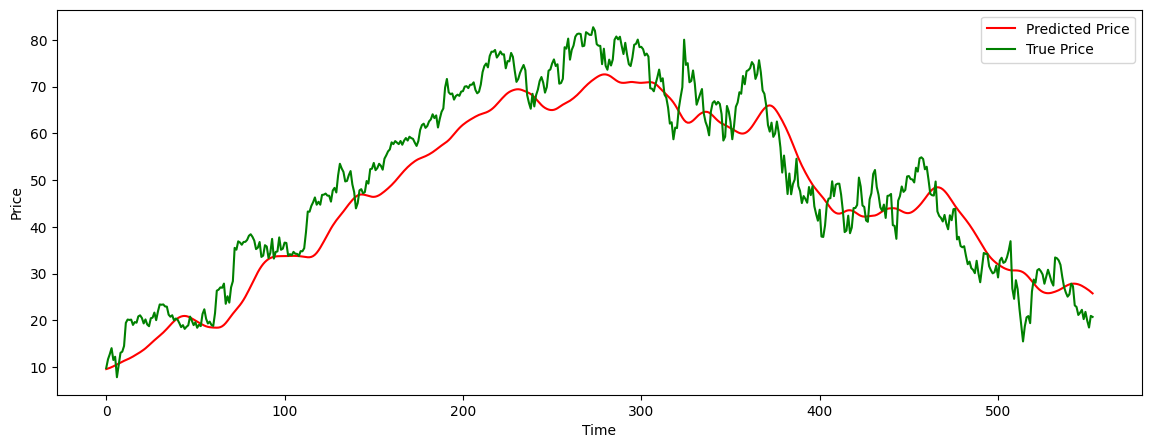

In [35]:
plt.figure(figsize=(14,5))
plt.plot(y_predict, 'r', label='Predicted Price')
plt.plot(y, 'g', label='True Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [36]:
model.save('Stock Predictions Model.keras')